# Homework 1

# A fashionable use case : clothing classification with `fashion-mnist`

- Load data with `fashion_mnist.load_data()` 
- There is no validation set, only a train and test set. 
- The labels correspond to the following things

| Label number | Label name  |
|--------------|-------------|
| 0	           | T-shirt/top |
| 1	           | Trouser     |
| 2	           | Pullover    |
| 3	           | Dress       |
| 4	           | Coat        |
| 5	           | Sandal      |
| 6	           | Shirt       |
| 7	           | Sneaker     |
| 8	           | Bag         |
| 9	           | Ankle boot  |

## Your job

- Try to understand the data, visualize it, like we did before with MNIST and noMNIST
- Create a neural network, using the ideas from before, that classify accurately the clothes on the test set
- You will need to build a validation set from the train set in order to tune hyperparameters

## We want to see the following things

- Some learning curves (training) and the accuracy obtained on the test set for the architecture you considered
- A discussion about the impact of the hyperparameters on the accuracy (size of the kernels, number of kernels, number of layers, etc.) 
- A clear comparison between your solutions (a table, or plots comparing the results obtained with different hyper-parameters and different architectures)
- An explanation of what kind of clothes are hard to distinguish and why (some visual explanation)
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did serious comparisons between different architectures
- You can do everything on your laptop, but it might be a good idea to use google `colab` (https://colab.research.google.com/) to get free access to a GPU
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Send your work using the following google form :

- https://forms.gle/G3Rwfcuj3MZfgXhr8

(you will need to create a google account if you don't have one).

## Example of architecture

As a start, you can use the following architecture (but you can and will change it) :

- Convolutional layer with 64 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 128 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 256 filters and 3 * 3 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Dense layer with 256 units
- Dropout with probability 0.5
- Dense output layer with softmax activation

In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import image
from keras.optimizers import SGD

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### The MNIST Fashion dataset contains 70,000 images. 60,000 are used in the trainning set and 10,000 in the testing set. 

In [3]:
print('Train set: X = %s, y = %s' % (train_images.shape, train_labels.shape))
print("\n")
print('Test set: X = %s, y = %s' % (test_images.shape, test_labels.shape))

Train set: X = (60000, 28, 28), y = (60000,)


Test set: X = (10000, 28, 28), y = (10000,)


In [4]:
# Normalization of pixel intensity of images
train_images = train_images / 255.0
test_images = test_images / 255.0

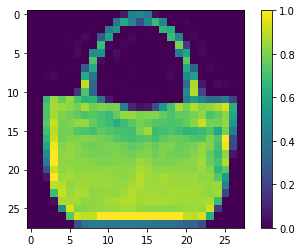

In [5]:
# Display of the 100th image
plt.imshow(train_images[100])
plt.colorbar()
plt.show()

#This is a bag so should be type 8

In [6]:
train_labels[100]
#it is type 8

8

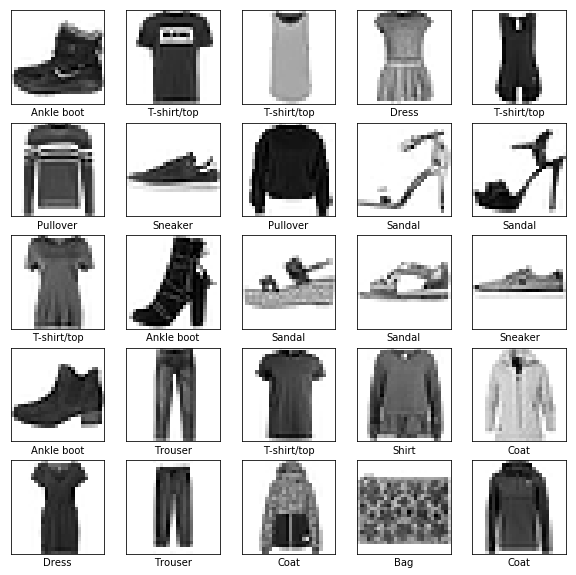

In [7]:
#showing the first 25 items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
#Reshaping in order to get into model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Training model

In [9]:
#defining the model


def model1():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
  #  model.add(Dropout(0.25))
    model.add(Flatten())
  #  model.add(Dropout(0.25))
  #  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
   # model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [10]:
model = model1()

In [11]:
modelhistory = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.4499 - accuracy: 0.8507 - val_loss: 0.3315 - val_accuracy: 0.8844
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.3052 - accuracy: 0.8930 - val_loss: 0.2980 - val_accuracy: 0.8931
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2677 - accuracy: 0.9062 - val_loss: 0.2873 - val_accuracy: 0.8959
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2453 - accuracy: 0.9131 - val_loss: 0.2689 - val_accuracy: 0.9023
Epoch 5/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2295 - accuracy: 0.9175 - val_loss: 0.2665 - val_accuracy: 0.9032
Epoch 6/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2144 - accuracy: 0.9235 - val_loss: 0.2671 - val_accuracy: 0.9046
Epoch 7/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2025 - accuracy: 0.9270 - val_loss: 0.2673 -

In [12]:
#hopefully saves model
model.save('finalmodel.h5')

# Accuracy and loss graph

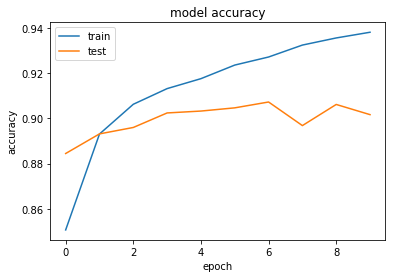

In [13]:
#display the accuracy on the train and validation set
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

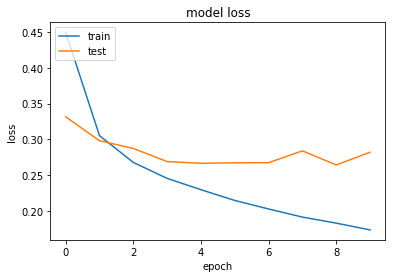

In [14]:
#displays the loss on the training and validation set
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Even though on the training set the accuracy is very good, on the training set it goes up and then stagnates around the third epoch which means that we have overfitted our model!

# Accuracy

In [15]:
#Looking at accuracy on the test dataset

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3006 - accuracy: 0.8960

Test accuracy: 0.8960000276565552


# Predictions

In [16]:
#seeing if the 300th image is correctly predicted in the test set
img = test_images[300]
img = img.reshape(1, 28, 28, 1)
result =model.predict(img)
print("Label number:", np.argmax(result),"\n","Certainty:",np.max(result))

Label number: 3 
 Certainty: 0.9990164


In [17]:
np.argmax(test_labels[300])

3

So here the prediction is correct

In [18]:
test_images[1].shape

(28, 28, 1)

In [19]:
predicted_labels = []
for i in range(len(test_images)):
    img = test_images[i]
    img = img.reshape(1,28,28,1)
    result =model.predict(img)
    predicted_labels.append(np.argmax(result))

# What clothes are hard to distinguish

In [20]:
actual_labels = []
for i in range(len(test_labels)):
    result = test_labels[i]
    actual_labels.append(np.argmax(result))
     

In [21]:
incorrect_predictions= []
labels_not_correctly_predicted_by_model = []
i = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i]!=actual_labels[i]:
        incorrect_predictions.append(predicted_labels[i])
        labels_not_correctly_predicted_by_model.append(actual_labels[i])
        

#pairs is just turning the two arrays incco incorrect_predictions and labels_not_correctly_predicted_by_model into one in order to count the occurrences
pairs = np.column_stack((incorrect_predictions, labels_not_correctly_predicted_by_model))
pairs = pairs.tolist()

In [22]:
#Here we find the most common errors
columns = ['Incorrect prediction','Label that was not predicted correctly', 'Error frequency of pair']
df= pd.DataFrame(columns=columns)
df 
for i in range(10):
    for j in range(10):
        df = df.append({'Incorrect prediction': i, 'Label that was not predicted correctly':j,'Error frequency of pair':pairs.count([i,j])}, ignore_index=True)
        
df = df.sort_values(['Error frequency of pair'], ascending=[False])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)

df.head()

,Incorrect prediction,Label that was not predicted correctly,Error frequency of pair
0,6,0,176
1,2,4,100
2,2,6,89
3,4,6,63
4,3,0,58


We can see here that Labels 2 (pullover),4 (coat), 6 (shirt) and 0 (t-shirt/top) are difficult to distinguish from each other. Let us see one instance of each error

In [23]:
#Here we take one example of the five most common errors
example_of_most_common_errors=[]
example_of_most_common_errors.append(next(i for i in range(len(predicted_labels)) if predicted_labels[i]==df.at[0,'Incorrect prediction'] and actual_labels[i]==df.at[0,'Label that was not predicted correctly']))
example_of_most_common_errors.append(next(i for i in range(len(predicted_labels)) if predicted_labels[i]==df.at[1,'Incorrect prediction'] and actual_labels[i]==df.at[1,'Label that was not predicted correctly']))
example_of_most_common_errors.append(next(i for i in range(len(predicted_labels)) if predicted_labels[i]==df.at[2,'Incorrect prediction'] and actual_labels[i]==df.at[2,'Label that was not predicted correctly']))
example_of_most_common_errors.append(next(i for i in range(len(predicted_labels)) if predicted_labels[i]==df.at[3,'Incorrect prediction'] and actual_labels[i]==df.at[3,'Label that was not predicted correctly']))
example_of_most_common_errors.append(next(i for i in range(len(predicted_labels)) if predicted_labels[i]==df.at[4,'Incorrect prediction'] and actual_labels[i]==df.at[4,'Label that was not predicted correctly']))


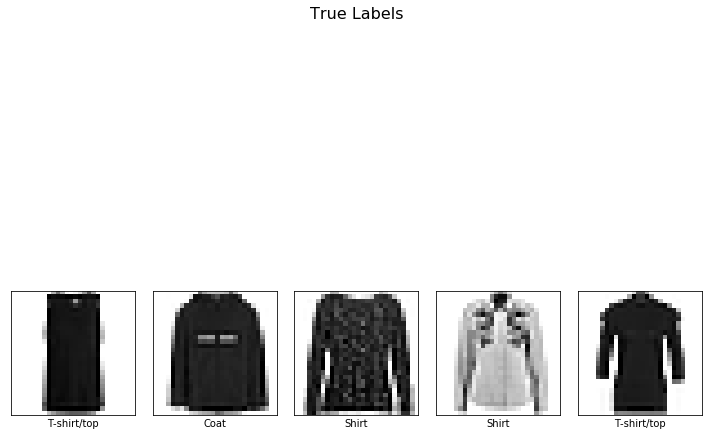

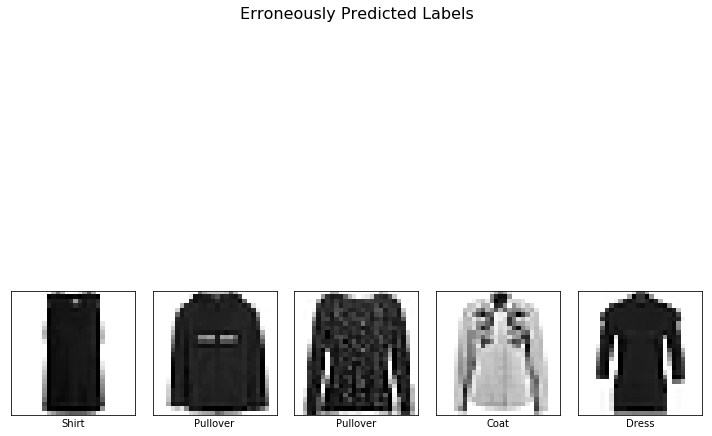

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(len(example_of_most_common_errors)):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[example_of_most_common_errors[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[example_of_most_common_errors[i]]])
plt.tight_layout()
plt.suptitle("True Labels", size=16)
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(example_of_most_common_errors)):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[example_of_most_common_errors[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[predicted_labels[example_of_most_common_errors[i]]])
plt.tight_layout()
plt.suptitle("Erroneously Predicted Labels", size=16)
plt.show()

Here we can see that the clothing items look quite similar due to them having similar general shapes and pixel intensity. Even a human would probably not differentiate all these clothing items correctly.